In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


trainingSensor = pd.read_csv("eeldata/data/Training/Origin/Sensor/Japonica/sensor_val_tb.csv")
validationSensor = pd.read_csv("eeldata/data/Validation/Origin/Sensor/Japonica/sensor_val_tb.csv")

traingFood = pd.read_csv("eeldata/data/Training/Origin/Management/Japonica/food_supply_tb.csv")
validationFood = pd.read_csv("eeldata/data/Validation/Origin/Management/Japonica/food_supply_tb.csv")

In [14]:
trainingSensor["mea_dt"] = trainingSensor["mea_dt"].apply(str)
trainingSensor["mea_dt"]  = trainingSensor["mea_dt"].str.slice(start=0, stop=15)
traingFood['feed_dt'] = pd.to_datetime(traingFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
traingFood["feed_dt"]=traingFood["feed_dt"].apply(str)
traingFood["feed_dt"]  = traingFood["feed_dt"].str.slice(start=0, stop=15)

validationSensor["mea_dt"] = validationSensor["mea_dt"].apply(str)
validationSensor["mea_dt"]  = validationSensor["mea_dt"].str.slice(start=0, stop=15)
validationFood['feed_dt'] = pd.to_datetime(validationFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
validationFood["feed_dt"] = validationFood["feed_dt"].apply(str)
validationFood["feed_dt"] = validationFood["feed_dt"].str.slice(start=0, stop=15)

In [15]:
traing = pd.merge(left = trainingSensor, right = traingFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
traing = traing.dropna(axis=0)
traing.head()

,Unnamed: 0,farm_id,tank_id,mea_dt,do_mg,do_temp,ph,orp,co2_mg,air_oxy,...,add_quantity,add_code2,add_quantity2,add_code3,add_quantity3,add_code4,add_quantity4,add_code5,add_quantity5,reg_dt
1905,173565,1,1,2021-08-09 04:3,9.2,28.3,6.15,201.2,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19
1906,173570,1,1,2021-08-09 04:3,9.1,28.3,6.15,201.5,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19
1907,173575,1,1,2021-08-09 04:3,9.0,28.3,6.15,201.0,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19
1908,173580,1,1,2021-08-09 04:3,8.8,28.3,6.15,200.9,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19
1909,173585,1,1,2021-08-09 04:3,9.1,28.3,6.15,201.0,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19


In [16]:
validation = pd.merge(left = validationSensor, right = validationFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
validation = validation.dropna(axis=0)
validation.head()

,Unnamed: 0,farm_id,tank_id,mea_dt,do_mg,do_temp,ph,orp,co2_mg,air_oxy,...,add_quantity,add_code2,add_quantity2,add_code3,add_quantity3,add_code4,add_quantity4,add_code5,add_quantity5,reg_dt
1905,173565,1,1,2021-08-09 04:3,9.2,28.3,6.15,201.2,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19
1906,173570,1,1,2021-08-09 04:3,9.1,28.3,6.15,201.5,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19
1907,173575,1,1,2021-08-09 04:3,9.0,28.3,6.15,201.0,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19
1908,173580,1,1,2021-08-09 04:3,8.8,28.3,6.15,200.9,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19
1909,173585,1,1,2021-08-09 04:3,9.1,28.3,6.15,201.0,10.2,0.0,...,1.5,c1-g,1.0,c2-g,0.5,c4-g,3.5,c5-g,1.0,2021-09-16 18:55:19


In [17]:
from sklearn.model_selection import train_test_split
#x = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y = traing[['do_mg']]
#x_train = traing[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_train = traing[['do_mg']]
#x_test = validation[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_test = validation[['do_mg']]
x_train = traing[['ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_train = traing[['do_mg']]
x_test = validation[['ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_test = validation[['do_mg']]
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [18]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train.values.ravel())

GradientBoostingRegressor()

0.8837030258221426


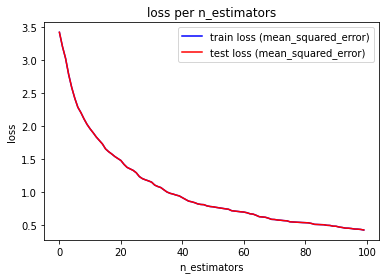

In [20]:
import matplotlib.pyplot as plt

print(gb_model.score(x_test, y_test))

train_losses = [mean_squared_error(y_train, y_predict) for y_predict in gb_model.staged_predict(x_train)]
test_losses = [mean_squared_error(y_test, y_predict) for y_predict in gb_model.staged_predict(x_test)]

plt.plot(range(len(train_losses)), train_losses, color='blue', label='train loss (mean_squared_error)')
plt.plot(range(len(test_losses)), test_losses, color='red', label='test loss (mean_squared_error)')
plt.title('loss per n_estimators') 
plt.xlabel('n_estimators')
plt.ylabel('loss')
plt.legend() #loc='upper left')
plt.show()

In [22]:
best_n_estimators = np.argmin(test_losses)
print(best_n_estimators)
print(test_losses[best_n_estimators])

model = GradientBoostingRegressor(n_estimators=best_n_estimators)

model.fit(x_train, y_train.values.ravel())

99
0.42879888361644275


GradientBoostingRegressor(n_estimators=99)

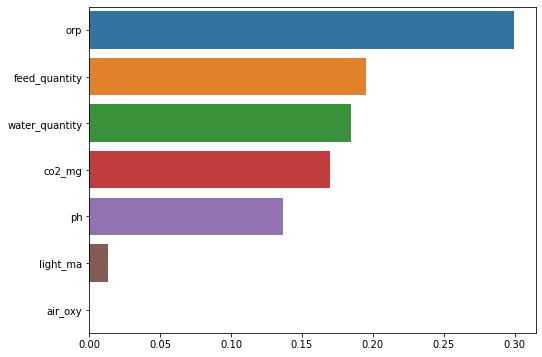

In [24]:
import seaborn as sns

ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

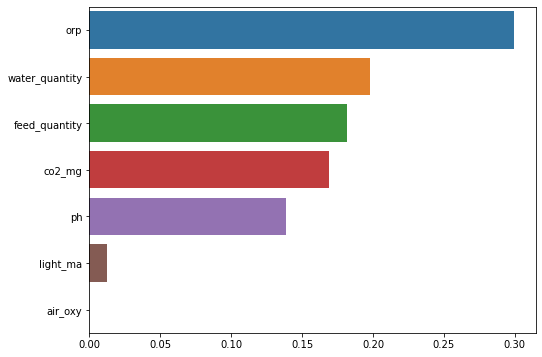

In [25]:
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

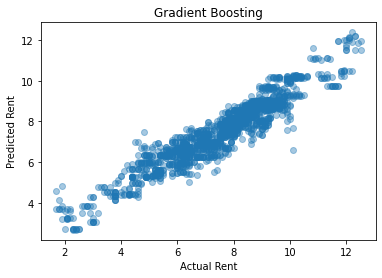

In [27]:
#import matplotlib.pyplot as plt

gb_valid_predict = gb_model.predict(x_test)

plt.scatter(y_test, gb_valid_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Gradient Boosting")
plt.show()

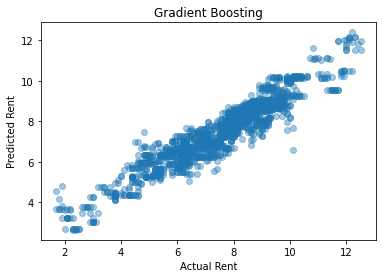

In [28]:
#import matplotlib.pyplot as plt

gb_valid_predict = model.predict(x_test)

plt.scatter(y_test, gb_valid_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Gradient Boosting")
plt.show()

In [29]:
print(gb_model.score(x_train, y_train))

print(gb_model.score(x_test, y_test))

0.8837030258221426
0.8837030258221426


In [30]:
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))

0.8813631215276246
0.8813631215276246
